In [ ]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import joblib
from pathlib import Path

In [77]:
PATH = Path("../data/metadata.csv")
df = pd.read_csv(PATH)
df

,Unnamed: 0.1,Unnamed: 0,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,...,hurt,changed,bleed,elevation,img_id,biopsed,group_id,JM_Hair,JM_Pen,JM_Pus
0,16,17,PAT_1783,3414,NaN,NaN,NaN,NaN,75,NaN,...,FALSE,FALSE,FALSE,True,PAT_1783_3414_120.png,False,J,1.0,NaN,NaN
1,27,28,PAT_302,651,True,False,GERMANY,GERMANY,64,True,...,TRUE,FALSE,TRUE,True,PAT_302_651_529.png,True,J,1.0,1.0,NaN
2,77,79,PAT_1094,381,NaN,NaN,NaN,NaN,41,NaN,...,FALSE,FALSE,FALSE,False,PAT_1094_381_85.png,False,J,NaN,NaN,NaN
3,78,80,PAT_645,4043,False,False,GERMANY,GERMANY,57,True,...,FALSE,FALSE,FALSE,False,PAT_645_4043_374.png,False,J,NaN,NaN,NaN
4,112,115,PAT_549,1043,False,False,BRAZIL,BRAZIL,85,False,...,FALSE,FALSE,FALSE,True,PAT_549_1043_676.png,True,J,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2027,2183,PAT_682,1292,False,False,POMERANIA,POMERANIA,75,False,...,FALSE,FALSE,TRUE,True,PAT_682_1292_642.png,True,J,NaN,NaN,NaN
113,2043,2205,PAT_223,1067,False,False,GERMANY,BRAZIL,73,False,...,FALSE,FALSE,FALSE,True,PAT_223_1067_569.png,False,J,NaN,1.0,NaN
114,2057,2227,PAT_726,1371,False,False,POMERANIA,POMERANIA,56,False,...,FALSE,FALSE,FALSE,True,PAT_726_1371_397.png,True,J,NaN,NaN,NaN
115,2062,2237,PAT_30,41,False,False,GERMANY,GERMANY,57,False,...,FALSE,UNK,FALSE,False,PAT_30_41_815.png,True,J,0.0,0.0,0.0


In [78]:
#df.columns

# This is the columns we are removing for training of the tree

colDrop = list(df.columns)
colDrop
columns2keep = ["age","diagnostic",'itch',"hurt","bleed","elevation"]
for i in columns2keep:
    colDrop.remove(i)

In [79]:
df = df.drop(columns=colDrop)
df

,age,diagnostic,itch,hurt,bleed,elevation
0,75,SEK,False,FALSE,FALSE,True
1,64,BCC,True,TRUE,TRUE,True
2,41,ACK,False,FALSE,FALSE,False
3,57,ACK,True,FALSE,FALSE,False
4,85,SCC,True,FALSE,FALSE,True
...,...,...,...,...,...,...
112,75,BCC,True,FALSE,TRUE,True
113,73,ACK,True,FALSE,FALSE,True
114,56,BCC,True,FALSE,FALSE,True
115,57,BCC,True,FALSE,FALSE,False


In [80]:
# Next blox or just for cleaning up the data

In [81]:
df = df[df["hurt"] != "UNK"]
df["hurt"] = ~df["hurt"].str.contains("FALSE", na=False)

C:\Users\johan\AppData\Local\Temp\ipykernel_9896\217399709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hurt"] = ~df["hurt"].str.contains("FALSE", na=False)


In [82]:
df = df[df["bleed"] != "UNK"]
df["bleed"] = ~df["bleed"].str.contains("FALSE", na=False)

In [83]:
df["elevation"].dropna()

0       True
1       True
2      False
3      False
4       True
       ...  
112     True
113     True
114     True
115    False
116     True
Name: elevation, Length: 116, dtype: bool

In [84]:
# X is input Y is output
X = df.iloc[:,0:20].drop(columns="diagnostic")
Y = df.iloc[:,1]

In [86]:
# seperation into test and training data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=1,test_size=0.2)

In [87]:
rf = RandomForestClassifier(n_estimators=1000,
                            criterion="entropy",
                            min_samples_split=11,
                            max_depth=15,
                            random_state=17,
                            min_samples_leaf=2)

In [88]:
# this are the parameters we can tune
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 11,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 17,
 'verbose': 0,
 'warm_start': False}

In [89]:
rf.fit(X_train,Y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",1000
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'entropy'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",11
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `met

In [90]:
# These following blox are Giving a Dianosis of how good the algo is

In [91]:
def second_highest_index(arr):
    arr = np.asarray(arr)
    unique_vals = np.unique(arr)
    if unique_vals.size < 2:
        return None
    second_highest = unique_vals[-2]
    return np.where(arr == second_highest)[0][0]

In [92]:
predictions = rf.predict(X_test)
probs = rf.predict_proba(X_test)
classes = rf.classes_
real = Y_test.to_numpy()

f = 0
fs = 0
for i in range(len(predictions)):
    first_correct = real[i] == predictions[i]
    colorF = "\033[0;34m" if first_correct else "\033[0;31m"

    second_idx = second_highest_index(probs[i])
    second_class = classes[second_idx] if second_idx is not None else None
    second_correct = real[i] == second_class
    colorS = "\033[0;34m" if second_correct else "\033[0;31m"
    colorForS = "\033[0;34m" if second_correct or first_correct else "\033[0;31m"
    f += int(first_correct)
    fs += int(second_correct or first_correct)
    print(
        f"real: {real[i]}, "
        f"pred: {predictions[i]}, "
        f"First guess: {colorF}{first_correct}\033[0m, "
        f"Second guess: {colorS}{second_correct}\033[0m "
        f"First or Second guess: {colorForS}{second_correct or first_correct}\033[0m"
    )
print(f/len(predictions),"   ", fs/len(predictions))

real: NEV, pred: NEV, First guess: True, Second guess: False First or Second guess: True
real: BCC, pred: BCC, First guess: True, Second guess: False First or Second guess: True
real: SEK, pred: SEK, First guess: True, Second guess: False First or Second guess: True
real: NEV, pred: NEV, First guess: True, Second guess: False First or Second guess: True
real: ACK, pred: ACK, First guess: True, Second guess: False First or Second guess: True
real: BCC, pred: ACK, First guess: False, Second guess: True First or Second guess: True
real: BCC, pred: BCC, First guess: True, Second guess: False First or Second guess: True
real: ACK, pred: ACK, First guess: True, Second guess: False First or Second guess: True
real: SCC, pred: BCC, First guess: False, Second guess: True First or Second guess: True
real: SCC, pred: BCC, First guess: False, Second guess: False First or Second guess: False
real: BCC, pred: BCC, First guess: True, Second guess: False First or Second guess: True
real: BCC, pred: AC

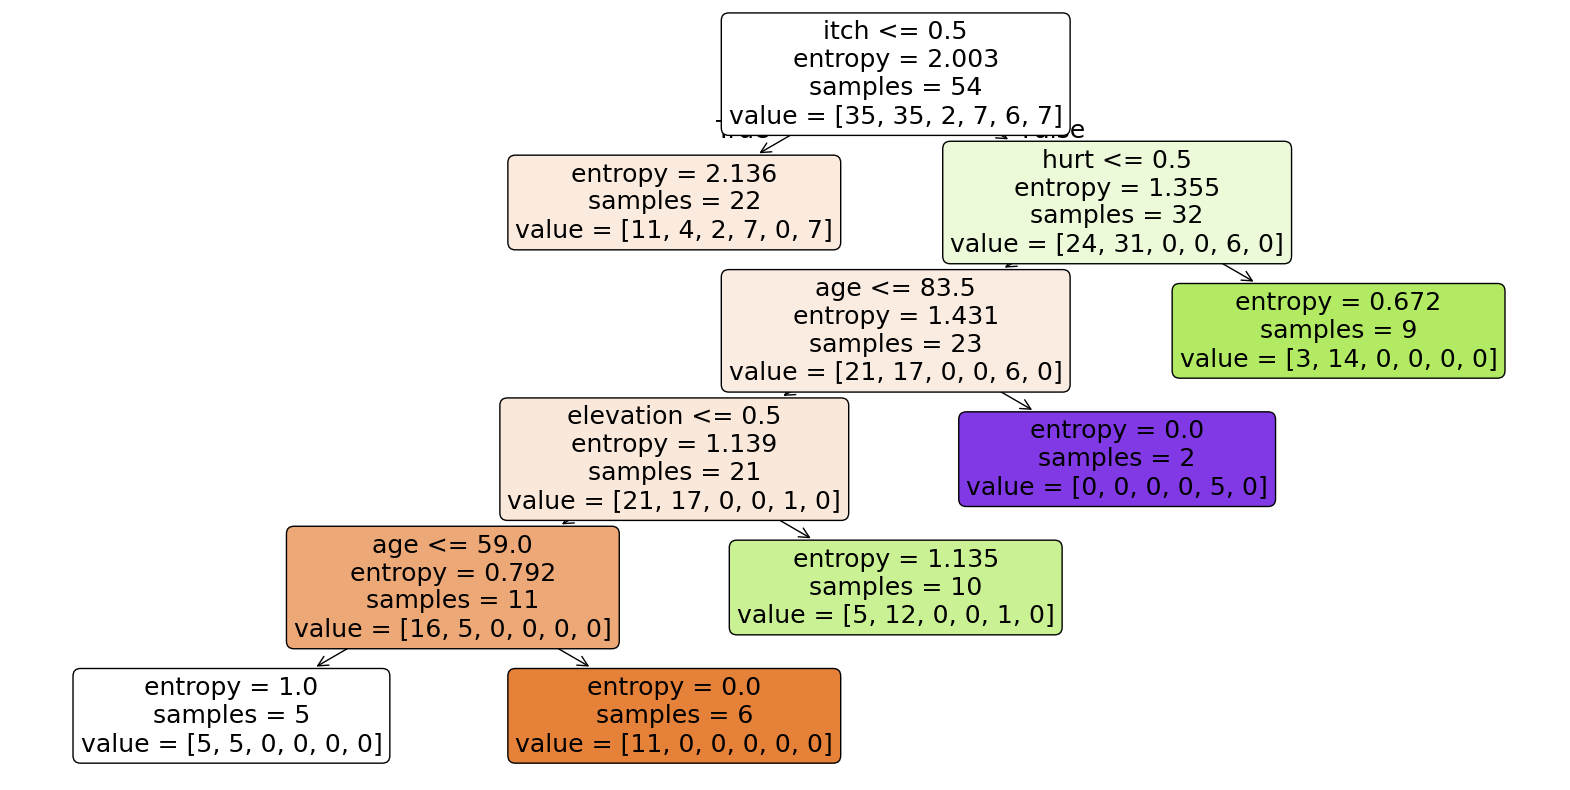

In [93]:
# Tree graph to interpret the predictions
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    rf.estimators_[0],
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    max_depth=10
)
plt.show()


In [94]:
# Save model
dumpPATH = Path("models/random_forest_model.pkl")
joblib.dump(rf, dumpPATH)

['models\\random_forest_model.pkl']